# Solar Prediction --- Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## Load the dataset

In [2]:
time_series = pd.read_csv("https://data.open-power-system-data.org/time_series/2020-10-06/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s.startswith('DE')),
                        parse_dates=[0], index_col=0)

In [3]:
time_series.head()

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,...,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0
2015-01-01 01:00:00+00:00,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,...,13267.0,12858.0,NaN,3974.0,466.0,3508.0,5087.0,4562.0,NaN,7.0
2015-01-01 02:00:00+00:00,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,...,12702.0,12611.0,NaN,4194.0,470.0,3724.0,4906.0,4517.0,NaN,8.0
2015-01-01 03:00:00+00:00,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,...,12452.0,12490.0,NaN,4446.0,473.0,3973.0,4865.0,4601.0,NaN,11.0


In [4]:
time_series.shape

(50401, 41)

In [5]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DE_load_actual_entsoe_transparency               50400 non-null  float64
 1   DE_load_forecast_entsoe_transparency             50376 non-null  float64
 2   DE_solar_capacity                                43800 non-null  float64
 3   DE_solar_generation_actual                       50297 non-null  float64
 4   DE_solar_profile                                 43696 non-null  float64
 5   DE_wind_capacity                                 43800 non-null  float64
 6   DE_wind_generation_actual                        50326 non-null  float64
 7   DE_wind_profile                                  43725 non-null  float64
 8   DE_wind_offshore_capacity                        43800 non-

In [6]:
clean_data = time_series.dropna()

## Exploratory data analysis

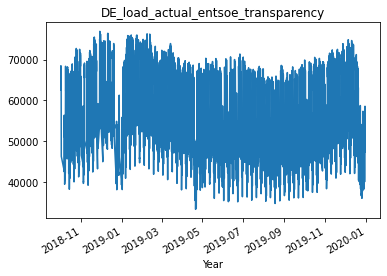

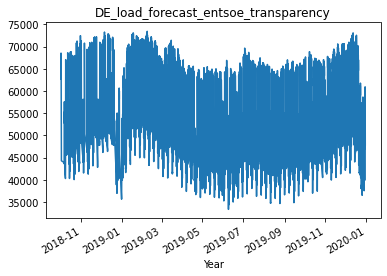

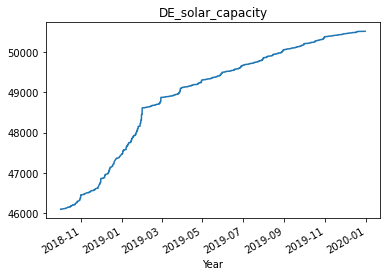

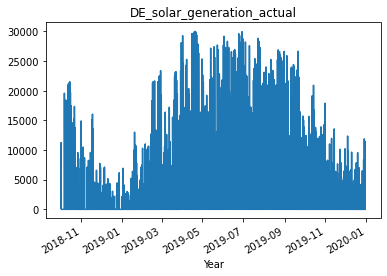

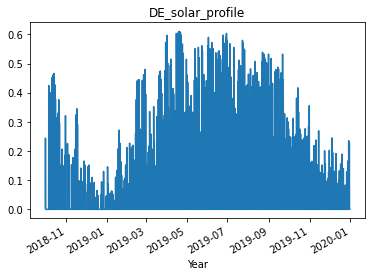

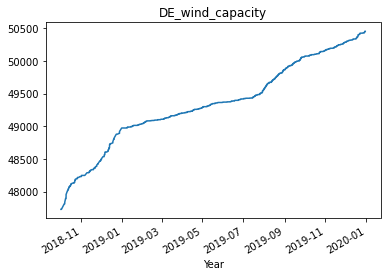

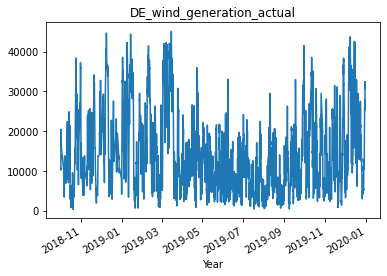

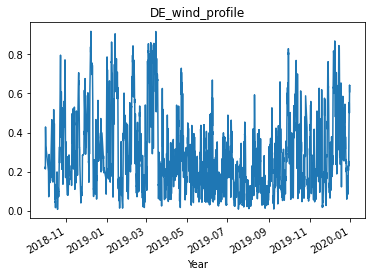

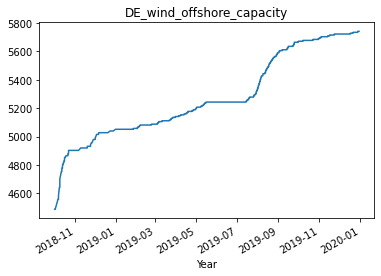

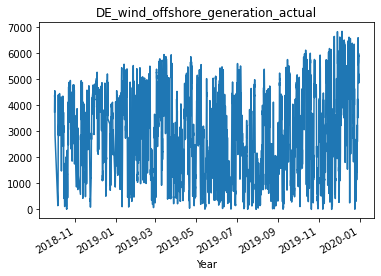

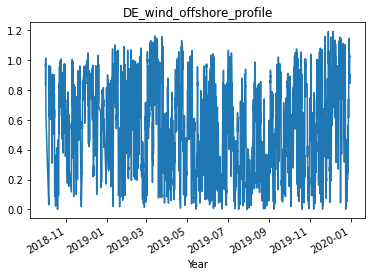

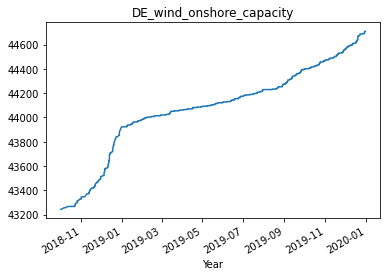

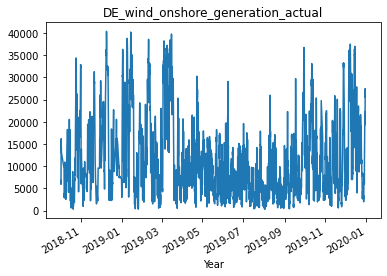

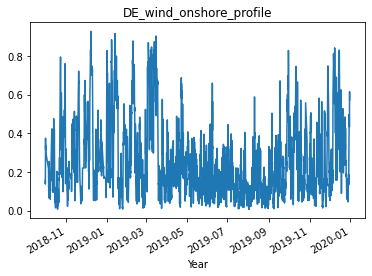

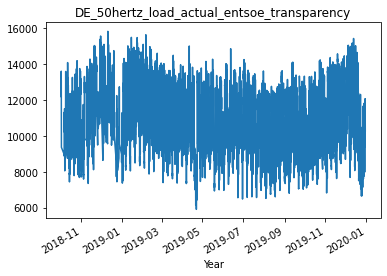

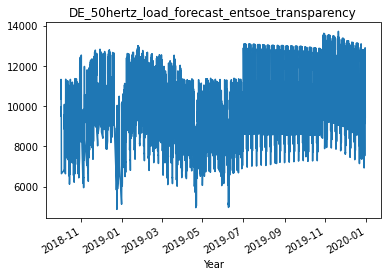

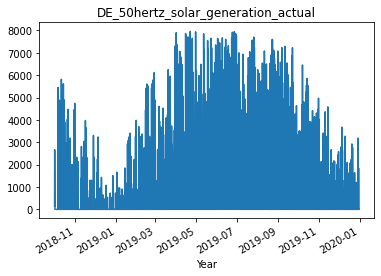

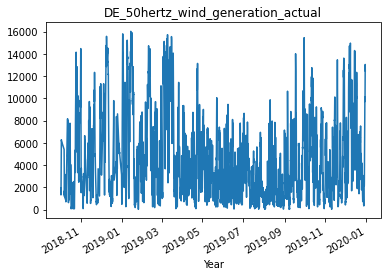

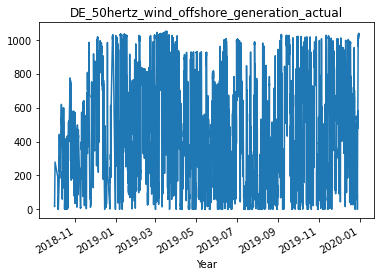

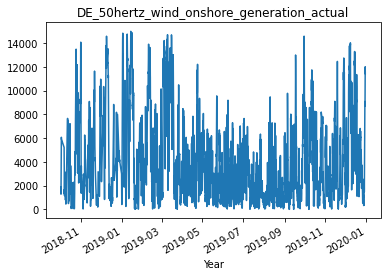

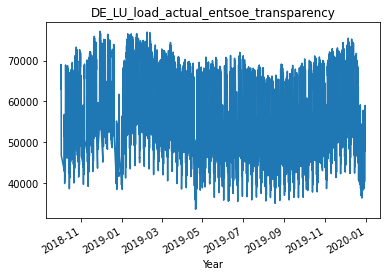

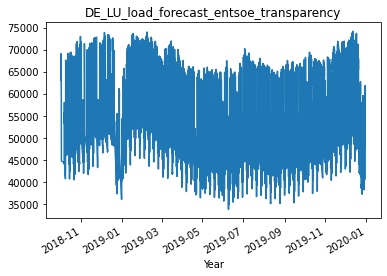

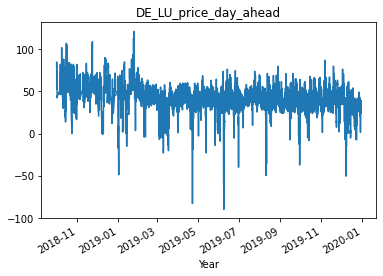

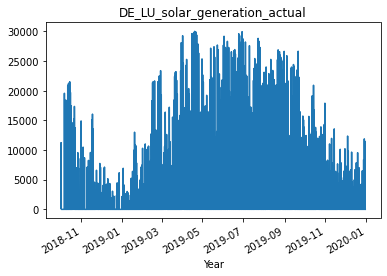

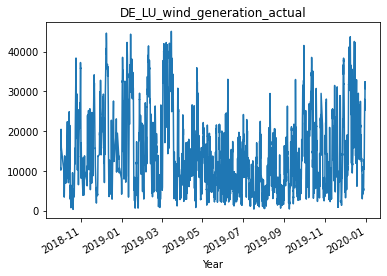

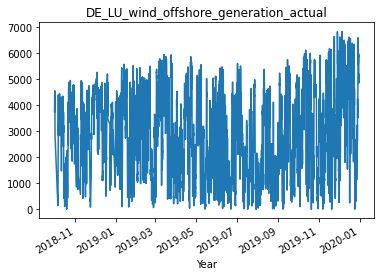

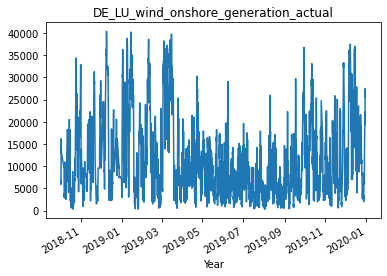

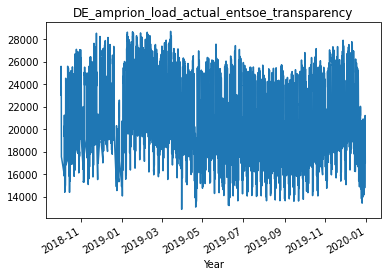

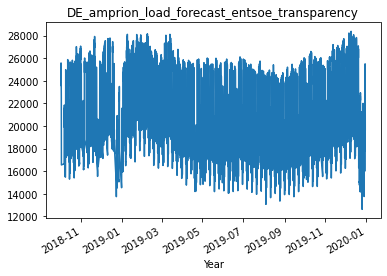

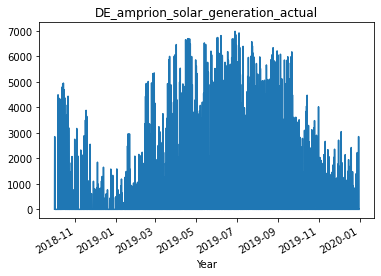

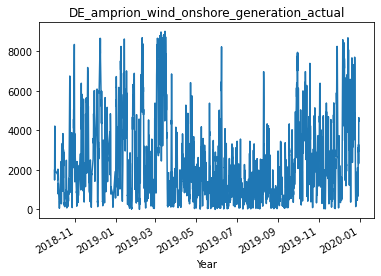

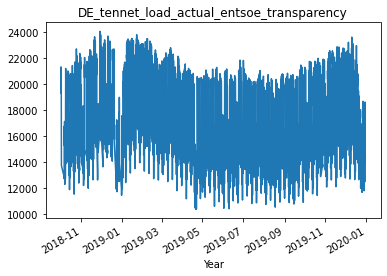

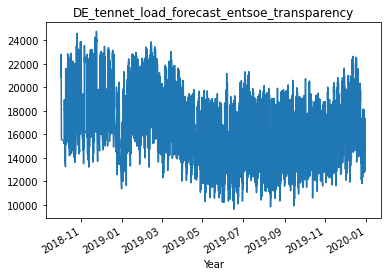

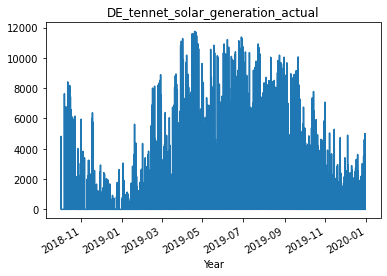

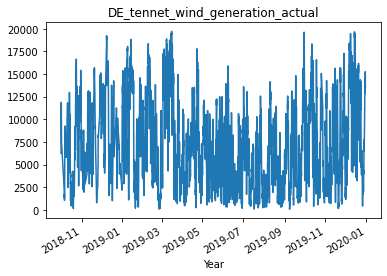

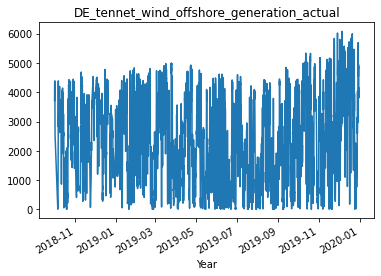

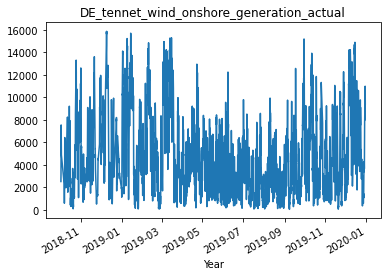

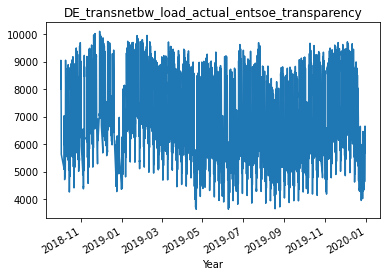

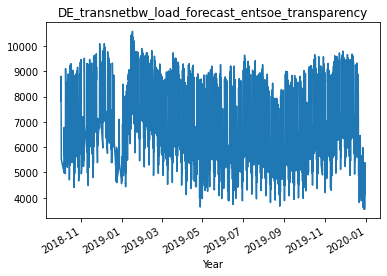

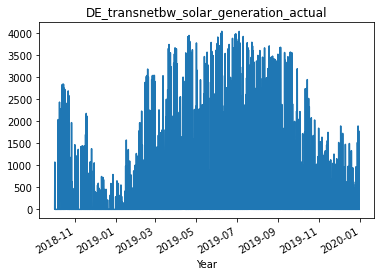

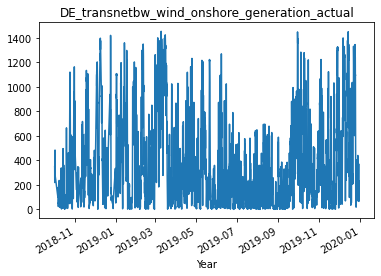

In [7]:
for i in clean_data.columns:
    clean_data[i].plot()
    plt.title(i)
    plt.xlabel("Year")
    # plt.ylabel("Frequency")

    plt.show()

(0.0, 27000.0)

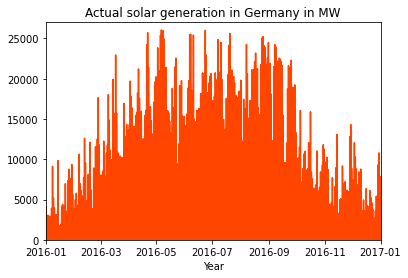

In [8]:
# create plot
plt.plot(time_series.index, time_series['DE_solar_generation_actual'], c='OrangeRed')
plt.title('Actual solar generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.xlabel("Year")
plt.ylim(0, 27000)

In [9]:
time_series_2016 = time_series.loc[time_series.index.year == 2016, :]

In [10]:
time_series_wind_solar = time_series_2016[['DE_wind_generation_actual', 'DE_solar_generation_actual']]

## Whether data

In [11]:
weather_data = pd.read_csv('https://data.open-power-system-data.org/weather_data/2017-07-05/weather_data_GER_2016.csv',
                           parse_dates=[0], index_col=0)

In [12]:
weather_data.head()

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 01:00:00+00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.0,0.0,277.025665,1.239390,99300.164062
2016-01-01 02:00:00+00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.0,0.0,277.223755,1.243861,99310.992188
2016-01-01 03:00:00+00:00,3,47.5,5.625,0.96,1.35,1.62,2,10,0.052480,0.0,0.0,277.133240,1.247390,99314.773438
2016-01-01 04:00:00+00:00,4,47.5,5.625,1.14,1.56,1.83,2,10,0.052480,0.0,0.0,276.867767,1.248869,99324.796875


In [13]:
weather_data.columns

Index(['cumulated hours', 'lat', 'lon', 'v1', 'v2', 'v_50m', 'h1', 'h2', 'z0',
       'SWTDN', 'SWGDN', 'T', 'rho', 'p'],
      dtype='object')

In [14]:
weather_data.shape

(2248704, 14)

In [15]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cumulated hours  int64  
 1   lat              float64
 2   lon              float64
 3   v1               float64
 4   v2               float64
 5   v_50m            float64
 6   h1               int64  
 7   h2               int64  
 8   z0               float64
 9   SWTDN            float64
 10  SWGDN            float64
 11  T                float64
 12  rho              float64
 13  p                float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


In [16]:
weather_data.loc[weather_data.index == '2016-01-01 00:00:00', :]

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 00:00:00+00:00,0,47.5,6.250,0.85,1.77,3.69,2,10,0.163823,0.0,0.0,277.609924,1.226037,98194.710938
2016-01-01 00:00:00+00:00,0,47.5,6.875,0.94,1.94,3.79,3,11,0.286626,0.0,0.0,276.850159,1.205101,96186.710938
2016-01-01 00:00:00+00:00,0,47.5,7.500,0.84,1.68,2.82,2,10,0.109472,0.0,0.0,276.414612,1.200341,95874.710938
2016-01-01 00:00:00+00:00,0,47.5,8.125,0.74,1.56,2.51,2,10,0.066503,0.0,0.0,276.039612,1.202233,96050.710938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 00:00:00+00:00,0,55.0,12.500,3.71,4.36,5.06,2,10,0.006501,0.0,0.0,277.781799,1.280602,102218.710938
2016-01-01 00:00:00+00:00,0,55.0,13.125,3.82,4.34,4.69,2,10,0.002311,0.0,0.0,277.668518,1.283288,102282.710938
2016-01-01 00:00:00+00:00,0,55.0,13.750,3.75,4.23,4.61,2,10,0.003382,0.0,0.0,276.957581,1.287438,102290.710938


In [17]:
weather_mean_by_day = weather_data.groupby(weather_data.index).mean()

In [18]:
weather_mean_by_day

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,8779.0,51.25,10.3125,3.684609,5.233516,7.098086,2.550781,10.550781,0.164608,0.0,0.0,272.140240,1.268835,99528.062500
2016-12-31 20:00:00+00:00,8780.0,51.25,10.3125,3.762305,5.307539,7.083867,2.550781,10.550781,0.164577,0.0,0.0,271.980562,1.269241,99470.789062
2016-12-31 21:00:00+00:00,8781.0,51.25,10.3125,3.792852,5.340195,7.122773,2.546875,10.546875,0.164536,0.0,0.0,271.809519,1.269414,99416.492188


(0.0, 12.0)

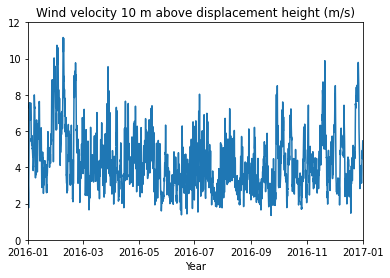

In [20]:
plt.plot(weather_mean_by_day.index, weather_mean_by_day['v2'])
plt.title('Wind velocity 10 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.xlabel("Year")
plt.ylim(0, 12)

(0.0, 1000.0)

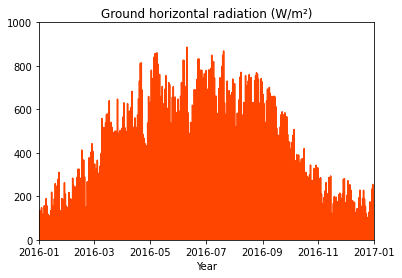

In [21]:
plt.plot(weather_mean_by_day.index, weather_mean_by_day['SWGDN'], c='OrangeRed')
plt.title('Ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.xlabel("Year")
plt.ylim(0, 1000)

(263.0, 303.0)

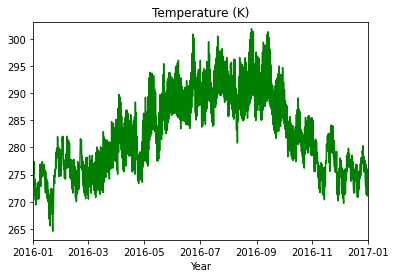

In [23]:
plt.plot(weather_mean_by_day.index, weather_mean_by_day['T'], c='green')
plt.title('Temperature (K)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.xlabel("Year")
plt.ylim(263, 303)

In [32]:
weather_mean_by_day['T (C)'] = weather_mean_by_day['T'] - 273.15

(-10.0, 30.0)

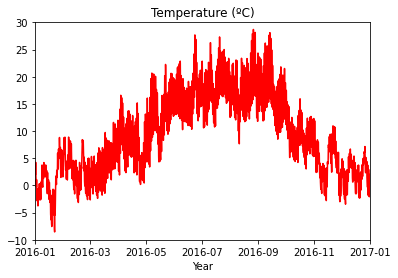

In [27]:
# create plot
plt.plot(weather_mean_by_day.index, weather_mean_by_day['T (C)'], c='Red')
plt.title('Temperature (ºC)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.xlabel("Year")
plt.ylim(-10, 30)

Text(0.5, 0, 'Year')

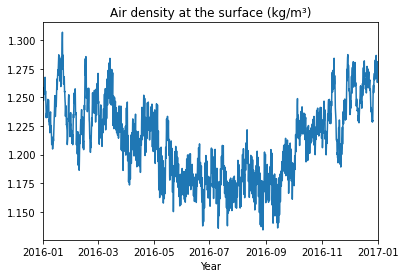

In [28]:
# create plot
plt.plot(weather_mean_by_day.index, weather_mean_by_day['rho'])
plt.title('Air density at the surface (kg/m³)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.xlabel("Year")

Text(0.5, 0, 'Year')

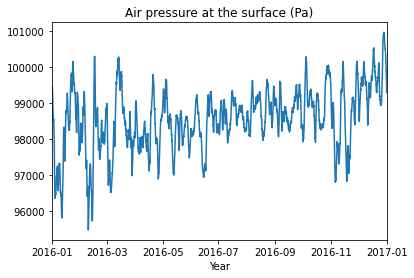

In [29]:
# create plot
plt.plot(weather_mean_by_day.index, weather_mean_by_day['p'])
plt.title('Air pressure at the surface (Pa)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.xlabel("Year")

In [34]:
# merge  DataFrames
merge_data = pd.merge(time_series_wind_solar, weather_mean_by_day, how='left', left_index=True, right_index=True)

# drop redundant column 'T (C)'
merge_data = merge_data.drop('T (C)', axis=1)

In [36]:
merge_data.head()

,DE_wind_generation_actual,DE_solar_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,8579.0,0.0,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,8542.0,0.0,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,8443.0,0.0,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,8295.0,0.0,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,7319.0,0.0,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000


In [37]:
merge_data.isnull().sum()

DE_wind_generation_actual     74
DE_solar_generation_actual    72
cumulated hours                0
lat                            0
lon                            0
v1                             0
v2                             0
v_50m                          0
h1                             0
h2                             0
z0                             0
SWTDN                          0
SWGDN                          0
T                              0
rho                            0
p                              0
dtype: int64

In [38]:
final_data = merge_data.dropna()

In [39]:
final_data.isnull().sum()

DE_wind_generation_actual     0
DE_solar_generation_actual    0
cumulated hours               0
lat                           0
lon                           0
v1                            0
v2                            0
v_50m                         0
h1                            0
h2                            0
z0                            0
SWTDN                         0
SWGDN                         0
T                             0
rho                           0
p                             0
dtype: int64

In [40]:
final_data.shape

(8710, 16)

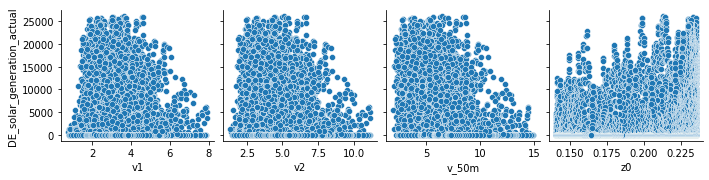

In [41]:
sns.pairplot(final_data, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_solar_generation_actual'])

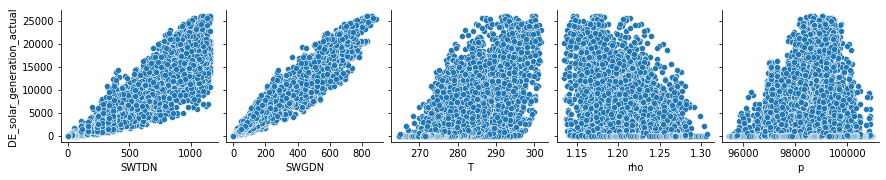

In [42]:
sns.pairplot(final_data, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_solar_generation_actual'])

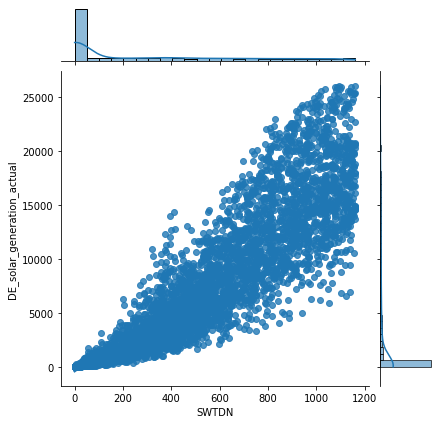

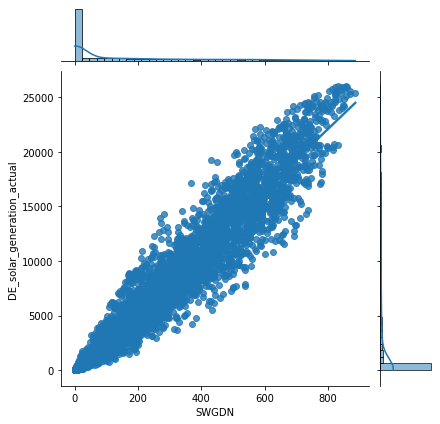

In [43]:
sns.jointplot(x='SWTDN', y='DE_solar_generation_actual', data=final_data, kind='reg')
sns.jointplot(x='SWGDN', y='DE_solar_generation_actual', data=final_data, kind='reg')

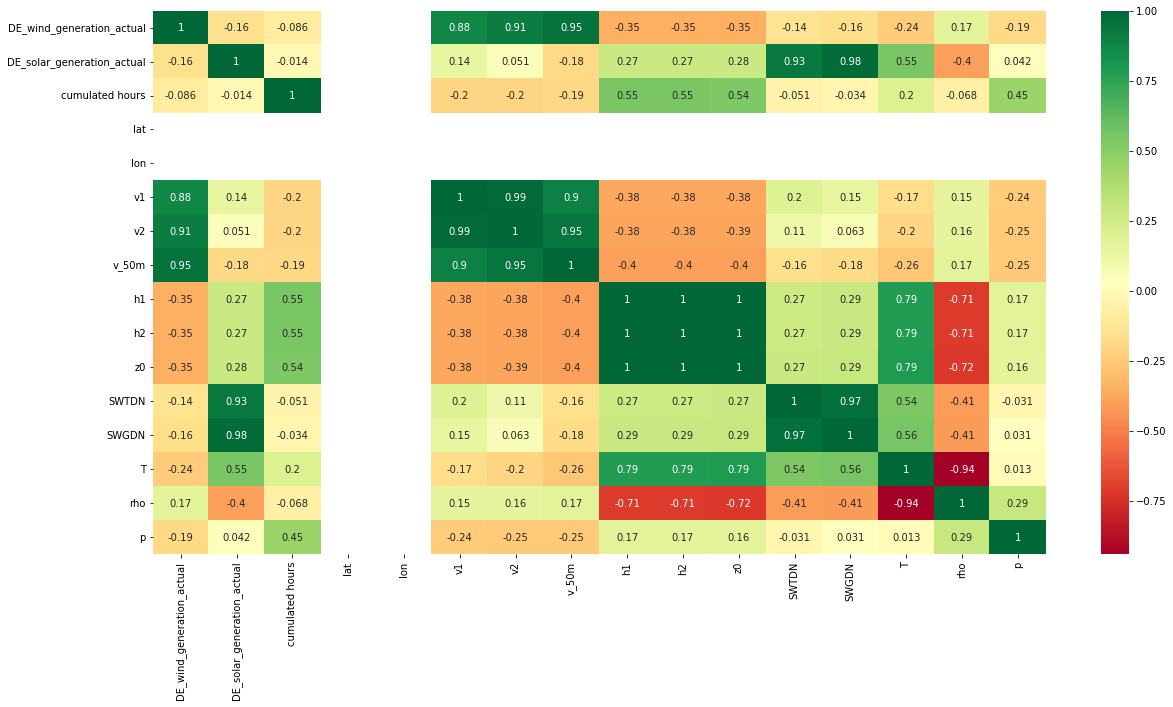

In [44]:
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(final_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [45]:
X_solar = final_data[['SWTDN', 'SWGDN', 'T']]
y_solar = final_data['DE_solar_generation_actual']

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_solar, y_solar, test_size=0.3) #split data into 70% train and 30% test

In [47]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6097, 3), (2613, 3), (6097,), (2613,))

In [48]:
y_train=y_train.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [49]:
model = Sequential()
model.add(Dense(32, input_dim=3, kernel_initializer='normal', activation='relu')) #input layer
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear')) # output layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [50]:
model.compile(loss='mse', optimizer='SGD', metrics=['mse','mae'])  # compile the model
history=model.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/50
33/33 [==============================] - 5s 29ms/step - loss: 0.0600 - mse: 0.0600 - mae: 0.1589 - val_loss: 0.0468 - val_mse: 0.0468 - val_mae: 0.1585
Epoch 2/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0493 - mse: 0.0493 - mae: 0.1671 - val_loss: 0.0434 - val_mse: 0.0434 - val_mae: 0.1593
Epoch 3/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0464 - mse: 0.0464 - mae: 0.1657 - val_loss: 0.0412 - val_mse: 0.0412 - val_mae: 0.1573
Epoch 4/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0440 - mse: 0.0440 - mae: 0.1627 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1533
Epoch 5/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0414 - mse: 0.0414 - mae: 0.1569 - val_loss: 0.0366 - val_mse: 0.0366 - val_mae: 0.1484
Epoch 6/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1519 - val_loss: 0.0343 - val_mse: 0.0343 - val_mae: 0.1431
Epoch 7/50
33/33 [=========

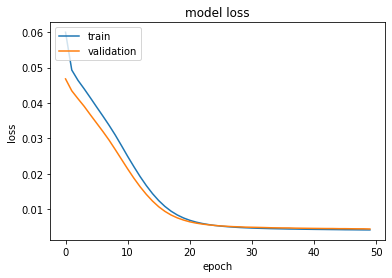

In [51]:
# loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
test_predictions = model.predict(xval_scale)  # prediction on test data

In [53]:
test_predictions = scaler_y.inverse_transform(test_predictions) # inverse transform of scale data
test_predictions

array([[19382.607   ],
       [   33.345024],
       [   62.348446],
       ...,
       [  140.57164 ],
       [19180.57    ],
       [14663.96    ]], dtype=float32)

In [54]:
y_train_pred = model.predict(xtrain_scale) # prediction on train data

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(ytrain_scale, y_train_pred))) # r2 score of train data
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_val, test_predictions)))  # r2 score of test data

The R2 score on the Train set is:	0.923
The R2 score on the Test set is:	0.931


In [55]:
x_scale=scaler_x.transform(X_solar)
x_scale=scaler_x.transform(X_solar) 
predictions = model.predict(x_scale) #predicton on complete dataset

predictions1 = scaler_y.inverse_transform(predictions) # inverse transform of scale data

In [56]:
predictions1[0:10]

array([[  33.634075],
       [  33.854214],
       [  34.10153 ],
       [  34.135307],
       [  34.254307],
       [  34.312347],
       [  34.534233],
       [  53.322414],
       [ 487.92706 ],
       [1564.8727  ]], dtype=float32)

In [57]:
print("The R2 score on the dataset is:\t{:0.3f}".format(r2_score(y_solar, predictions1)))

The R2 score on the dataset is:	0.926


In [ ]:
final_data['Predicted_Power_Generated'] = predictions1 # create a prediction column

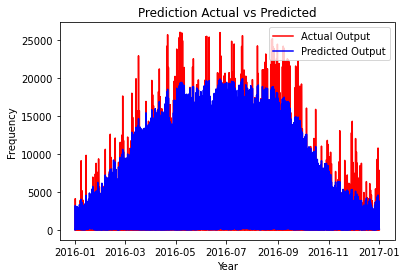

In [59]:
plt.plot(final_data['DE_solar_generation_actual'], color = 'red', label = 'Actual Output')
plt.plot(final_data['Predicted_Power_Generated'], color = 'blue', label = 'Predicted Output')
plt.title('Prediction Actual vs Predicted')
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend()
plt.show()